<a href="https://colab.research.google.com/github/KPorus/NLP-LLM--Learning-/blob/main/ML_Profit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
uploaded = files.upload()

Saving online.csv to online.csv


In [ ]:
file_content = uploaded['online.csv']
df = pd.read_csv(io.StringIO(file_content.decode('utf-8')))
df.head(10)

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


In [ ]:
df.shape

(50, 5)

In [ ]:
df.isnull().sum()

,0
Marketing Spend,0
Administration,0
Transport,0
Area,0
Profit,0


In [ ]:
df['Area'].unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# df['Area'] = ohe.fit_transform(df[['Area']]).toarray()
# df.head(100)
# from sklearn.compose import ColumnTransformer
# ct = ColumnTransformer([('Area', OneHotEncoder(), [0])], remainder = 'passthrough')
# df['Area'] = df['Area'].astype(str)
# df= ct.fit_transform(df)
# df.head(10)

#one hot encoding
Cause:
1. Area colum data is not order type like(bad,good,best)
2. And has 3 dim only

In [ ]:
dfle = df
city = pd.get_dummies(dfle['Area'],dtype=int,drop_first=True)
# print(city)
dfle = pd.concat([dfle,city],axis=1)
dfle.drop(['Area'],axis=1,inplace=True)
dfle.head(10)

    Dhaka  Rangpur
0       1        0
1       0        0
2       0        1
3       1        0
4       0        1
5       1        0
6       0        0
7       0        1
8       1        0
9       0        0
10      0        1
11      0        0
12      0        1
13      0        0
14      0        1
15      1        0
16      0        0
17      1        0
18      0        1
19      1        0
20      0        0
21      1        0
22      0        1
23      0        1
24      1        0
25      0        0
26      0        1
27      1        0
28      0        1
29      1        0
30      0        1
31      1        0
32      0        0
33      0        1
34      0        0
35      1        0
36      0        1
37      0        0
38      1        0
39      0        0
40      0        0
41      0        1
42      0        0
43      1        0
44      0        0
45      1        0
46      0        1
47      0        0
48      1        0
49      0        0


,Marketing Spend,Administration,Transport,Profit,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,1,0
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,1,0
9,123334.88,108679.17,304981.62,149759.96,0,0


In [ ]:
# le = LabelEncoder()
# dfle = df
# dfle['Area'] = le.fit_transform(dfle['Area'])
# df.head(10)

In [ ]:
dfle.corr()

,Marketing Spend,Administration,Transport,Profit,Dhaka,Rangpur
Marketing Spend,1.000000,0.230437,0.685442,0.937948,0.039068,0.105711
Administration,0.230437,1.000000,-0.032154,0.200717,0.005145,0.010493
Transport,0.685442,-0.032154,1.000000,0.747766,-0.033670,0.205685
Profit,0.937948,0.200717,0.747766,1.000000,0.031368,0.116244
Dhaka,0.039068,0.005145,-0.033670,0.031368,1.000000,-0.492366
Rangpur,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dfle.drop('Profit',axis='columns'),dfle.Profit,test_size=0.2)

In [ ]:
print(x_train)

    Marketing Spend  Administration  Transport  Dhaka  Rangpur
5         131876.90        99814.71  362861.36      1        0
42         23640.93        96189.63  148001.11      0        0
31         61136.38       152701.92   88218.23      1        0
20         76253.86       113867.30  298664.47      0        0
40         28754.33       118546.05  172795.67      0        0
38         20229.59        65947.93  185265.10      1        0
4         142107.34        91391.77  366168.42      0        1
13         91992.39       135495.07  252664.93      0        0
14        119943.24       156547.42  256512.92      0        1
19         86419.70       153514.11       0.00      1        0
47             0.00       135426.92       0.00      0        0
30         61994.48       115641.28   91131.24      0        1
43         15505.73       127382.30   35534.17      1        0
11        100671.96        91790.61  249744.55      0        0
28         66051.52       182645.56  118148.20      0  

Text(0.5, 0, 'Profit')

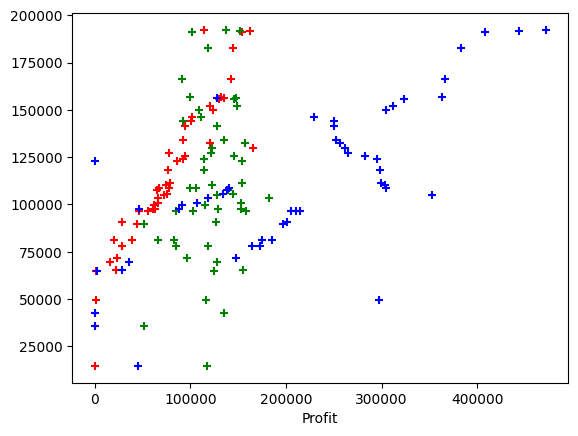

In [ ]:
plt.scatter(dfle['Marketing Spend'],dfle.Profit,color="red",marker='+')
plt.scatter(dfle['Administration'],dfle.Profit,color="green",marker='+')
plt.scatter(dfle.Transport,dfle.Profit,color="blue",marker='+')
# plt.scatter(dfle.Area,dfle.Profit,color="yellow",marker='+')
plt.xlabel("Profit")

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9026539297433565

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = model.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

96734639.12669355
7732.968799211029


#R-Squared value

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.9026539297433565

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model2 = LogisticRegression()
# model2.fit(x_train,y_train)
# model2.score(x_test,y_test)